In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


In [2]:
import glob
import os

# Load Data

In [3]:
path='C:/Users/abhig/Desktop/Kaggle_Competition/UCI/Latest/'# Assign the path

In [4]:
df=pd.read_csv(path+"heart.csv") # Load data and screen the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EDA

In [5]:
df.isna().sum() # This suggests none of the columns has missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].value_counts(normalize=True) # This shows that the data is balanced well. The data splits between 51% and 48% between disease and normal.

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### The data does not have any categorical value. All columns are either integer or floats.

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


C:\Users\abhig\AppData\Local\Temp\ipykernel_8188\2468268929.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abhig\AppData\Local\Temp\ipykernel_8188\2468268929.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abhig\AppData\Local\Temp\ipykernel_8188\2468268929.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abhig\AppData\Local\Temp\ipykernel_8188\2468268929.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


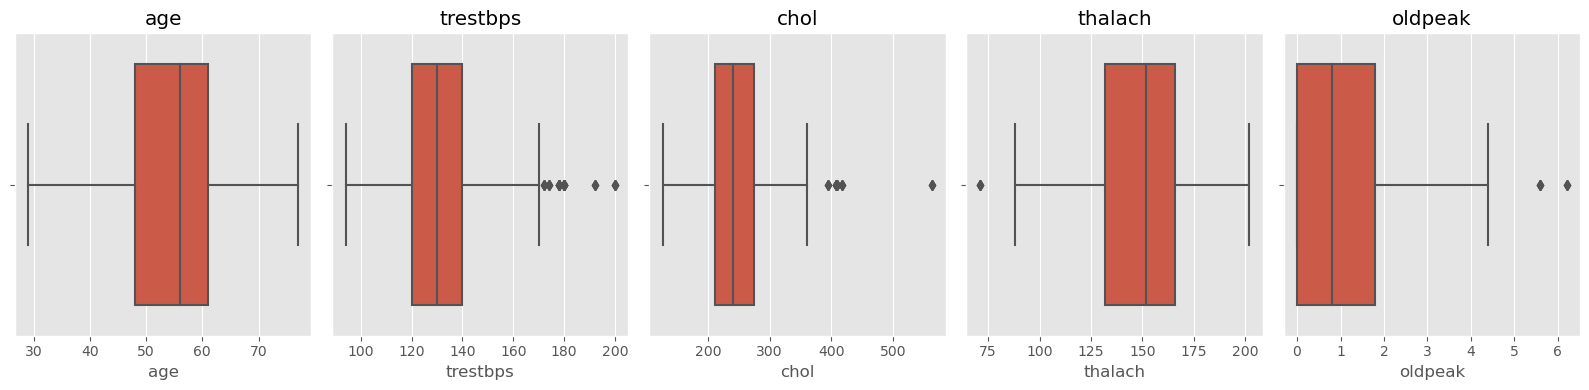

In [10]:
# Outlier detection
df_num=df[['age','trestbps','chol','thalach','oldpeak']]
fig,axes=plt.subplots(1,5,figsize=(16,4))
for index, col in enumerate(df_num.columns):
    sns.boxplot(data=df_num,x=col,ax=axes[index])
    axes[index].set_title(col)
    plt.tight_layout()
plt.show()

### Data shows trestbps, chol, thalach and oldpeak have outliers

In [11]:
df_x=df.drop(columns=['target'],axis=1)
df_y=df['target']
df_x.shape,df_y.shape

((1025, 13), (1025,))

## Correlation

### Since the data has outliers, we should do winsorize before determining the correlation by Pearson method. The Pearson method is affected by outliers so its is important to remove the outliers. In this case instead of removing the data set I choose to cap the outliers.


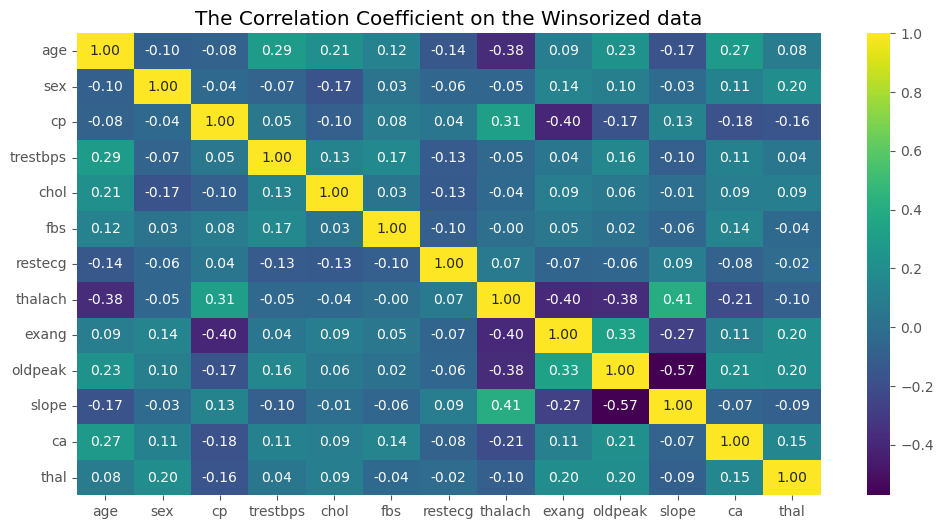

In [12]:
from scipy.stats.mstats import winsorize
for col in df_num.columns:
    df_x[col]=winsorize(df_x[col],limits=(0.05,0.05))

correlation=df_x.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(correlation,cmap='viridis',annot=True,fmt='.2f')
plt.title('The Correlation Coefficient on the Winsorized data')
plt.show()

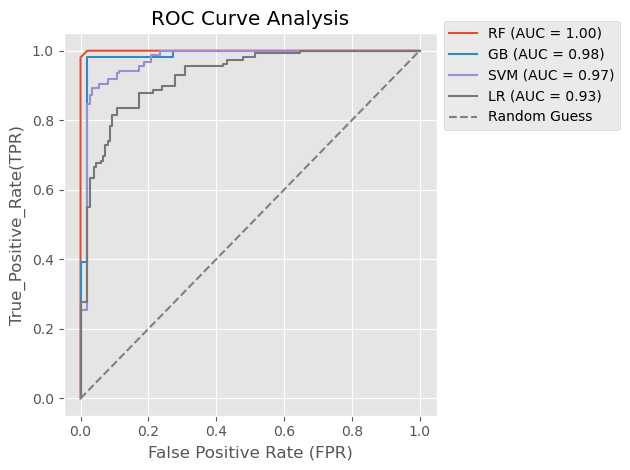

,Model,Accuracy,F1,AUC
0,RF,0.980519,0.980645,0.999810
1,GB,0.970779,0.971246,0.983038
2,SVM,0.912338,0.913738,0.970928
3,LR,0.834416,0.845921,0.926667


In [13]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,RocCurveDisplay,auc,accuracy_score,f1_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,stratify=df_y,test_size=0.3,random_state=42 )#Train/test split

#Removing the outliers but careful for dataleakage
value=df_x.select_dtypes(include=['float','int']).columns

Q1=x_train[value].quantile(0.05)
Q3=x_train[value].quantile(0.95)
IQR=Q3-Q1
Lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

x_train=x_train.clip(Lower_limit,upper_limit,axis=1)
x_test=x_test.clip(Lower_limit,upper_limit,axis=1)

#Standarization
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

models={'RF':RandomForestClassifier(random_state=42),'GB':GradientBoostingClassifier(random_state=42),'SVM':SVC(probability=True,random_state=42),'LR':LogisticRegression(random_state=42)}

result=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_prob=model.predict_proba(x_test)[:,1]

    accuracy=accuracy_score(y_test,y_pred)
    F1=f1_score(y_test,y_pred)
    fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
    AUC=auc(fpr,tpr)
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {AUC:.2f})')
    result.append({'Model':name,'Accuracy':accuracy,'F1':F1,'AUC':AUC})


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')# Random guess line
plt.title('ROC Curve Analysis')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True_Positive_Rate(TPR)')
plt.legend(bbox_to_anchor=(1,1.05),loc='upper left')
plt.tight_layout()
plt.show()
    
df_results = pd.DataFrame(result)
df_results.head()



Random Forest shows AUC of 1 which is a red flag. This is sign of over fitting. The possible reason meay be, in RandomForest the fitting is done for gini node purity, and in the default n_min_sample_split=2, n_min_sample_leaf=1, which would overfit the model to noise in the dataset. In order to address I performed more exhaustive options in GridSearch to balance the over fitting and under fitting.

The Best Parameters are:RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)
The Best Parameters are:0.9940155589947134
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       150
           1       0.81      0.89      0.85       158

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308

The AUC is, 0.9962025316455696


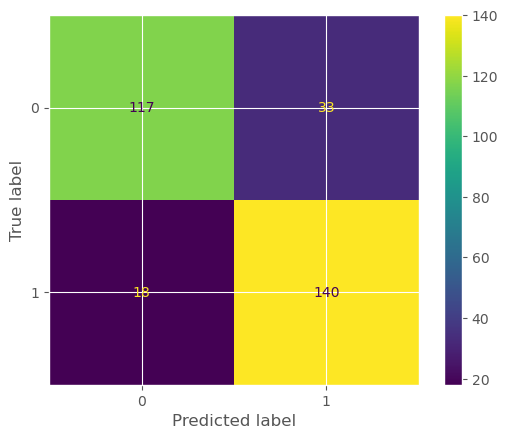

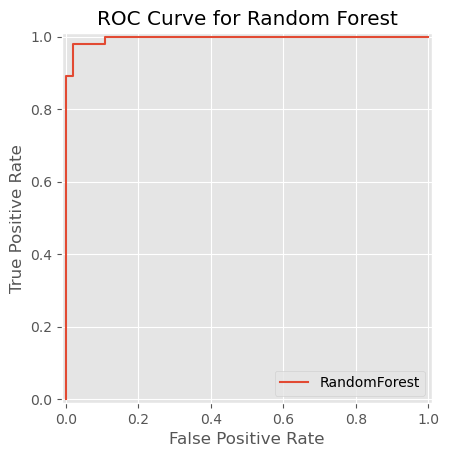

In [14]:
## Following code describes hyper tuned Random Forest model for best parameters and use the model to determine the important features
from sklearn.model_selection import StratifiedKFold,cross_validate,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

rf=RandomForestClassifier(class_weight='balanced_subsample',random_state=42)# Assigned Random Forest, here I need the balanced subclass for bootsraping to properly split the samples in training
#Hyper parameter

param_grid = {'n_estimators': [300, 500, 800],'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [10, 20, None],'min_samples_split': [5, 10],'min_samples_leaf': [2, 4, 8],'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],'max_samples': [None, 0.7, 0.9],'class_weight': [None, 'balanced_subsample']}


#Cross Validation
cv_kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

#GridSearchCV for best model
grid=RandomizedSearchCV(rf,param_distributions=param_grid,n_iter=50,cv=cv_kfold,scoring='roc_auc',random_state=42,refit=True)
grid.fit(x_train,y_train)
best_model=grid.best_estimator_#Best Model
best_parameter=grid.best_params_
best_score=grid.best_score_
print(f"The Best Parameters are:{best_model}")
print(f"The Best Parameters are:{best_score}")

y_predict=best_model.predict(x_test)
y_pred_prob=best_model.predict_proba(x_test)[:,1]

#Evaluation
F1=f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
best_auc=roc_auc_score(y_test,y_pred_prob)
RocCurveDisplay(fpr=fpr, tpr=tpr,  estimator_name="RandomForest").plot()
print(f'The AUC is, {best_auc}')
plt.title('ROC Curve for Random Forest')

#Feature Importance
important_feature=best_model.feature_importances_#Provides numpy array
important_feature=pd.DataFrame(important_feature,index=df_x.columns,columns=['Feature_Importance'])


The model initially outperformed with accuracy at 98%, F1-Score at 97% and AUC at about 100%. This model was fitted using default scoring metrics for screening. Afterwards in hyperparameter tuning with 5 fold cross validation the accuracy dropped to 84%. 

 This may be against the expectation, but in first place model overfits because no cross validation was included, and default fitting is done by gini, with max depth possible for the trees (n_sample_spli=2, and n_sample_leafs_1). This initial model was intentionally done to screen the best model.

Once I found the best model, under hyperparameter tuning the overfitting issue was resolved. 
In test dataset initiallyn AUC and accuracy were 99% and 84% accuracy, respectively. Now the question is why accuracy and AUC are so different?
One of the reason could be un-balanced sample cohort but that option rules out since in this case both categories are almost close to 50%. The second option could be poor optimization threshold used for calculating accuracy. By default, the model uses 0.5 as threshold, which may not be correct in this case. Thus, I used Youden's J statistic to improve accuracy, so AUC and Accuracy go hands in hand.


In [15]:
J_statistic=tpr-fpr
best_threshold=threshold[J_statistic.argmax()]
print("Best Threshold (Youden's J):", best_threshold)

y_pred_best = (y_pred_prob >= best_threshold).astype(int)

print("Accuracy at best threshold:", accuracy_score(y_test, y_pred_best))
print("F1-score at best threshold:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Threshold (Youden's J): 0.5349775132275131
Accuracy at best threshold: 0.9805194805194806
F1-score at best threshold: 0.9810126582278481
Confusion Matrix:
 [[147   3]
 [  3 155]]


The accuracy is improved to 98% and AUC is 99%

## Feature Importance

In [16]:
important_feature.head().sort_values(by='Feature_Importance',ascending=False) 

,Feature_Importance
cp,0.143388
age,0.104717
chol,0.079430
trestbps,0.070810
sex,0.036843


Based on the leaf purity cp is the most important feature followed by age and cholesterol.

In [17]:

import shap
from sklearn.inspection import permutation_importance

# Permutation importance (AUC-based) 
perm = permutation_importance(best_model, x_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42)
perm_df = pd.DataFrame({'feature': df_x.columns,'perm_importance': perm.importances_mean})
perm_df.head(5).sort_values(by='perm_importance',ascending=False)

,feature,perm_importance
2,cp,0.028489
0,age,0.006975
3,trestbps,0.006586
1,sex,0.006460
4,chol,0.005730


In this model each features are removed from the model and roc_auc is calculated. The features are predicted in the order for which the AUC drops most.
Both the Feature_importance and Permutation_importnce its evident that cp and age are the most contributing factors.